In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology
import os

In [2]:
def load_mask(path):
    '''Load and process the mask'''
    GT = io.imread(path) + 1
    GT[GT != 1] = 0
    GT = GT.astype(np.bool)
    return GT

def compute_iou(mask, GT):
    '''Computes IoU'''
    intersection = np.logical_and(mask, GT)
    union = np.logical_or(mask, GT)
    return np.sum(intersection) / np.sum(union)


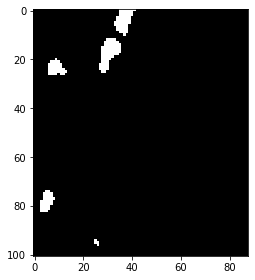

In [3]:
GT = load_mask('features/GroundTruth.tif')
io.imshow(GT[40])

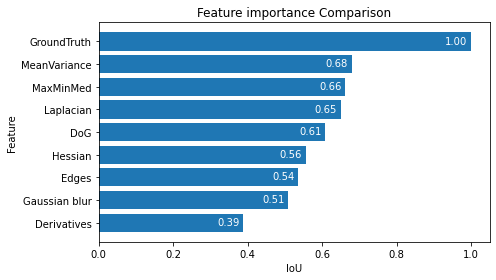

In [4]:
vals = {}
for file in os.listdir('features'):
    if file.endswith('.tif'):# and '2' not in file and '3' not in file:
        if '3' not in file and '2' not in file and 'Trainable' not in file:
            mask = load_mask('features/' + file)
            iou = compute_iou(mask, GT)
            vals[file.split('.')[0]] = iou

vals = {k: v for k, v in sorted(
    vals.items(), key=lambda item: item[1], reverse = False)}

labels = list(vals.keys())
values = list(vals.values())

fig = plt.figure(figsize=(7,4))
plt.barh(labels, values)
for i, v in enumerate(values):
    plt.text(v - 0.07, i-0.1, '{:.2f}'.format(v), color='white')

plt.xlabel('IoU')
plt.ylabel('Feature')
plt.title('Feature importance Comparison')
plt.tight_layout()
fig.savefig('Feature_Comparison.pdf')


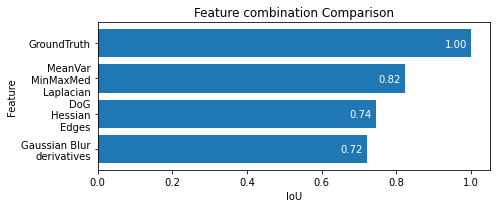

In [5]:
vals = {}
for file in os.listdir('features'):
    if file.endswith('.tif'):# and '2' not in file and '3' not in file:
        if ('3' in file or '2' in file or 'Ground' in file) and 'Trainable' not in file:
            mask = load_mask('features/' + file)
            iou = compute_iou(mask, GT)
            vals[file.split('.')[0]] = iou

vals = {k: v for k, v in sorted(
    vals.items(), key=lambda item: item[1], reverse = False)}

labels = list(vals.keys())
labels = [  'GroundTruth',
            'MeanVar\nMinMaxMed\nLaplacian',
            'DoG\nHessian\nEdges',
            'Gaussian Blur\nderivatives']
labels.reverse()
values = list(vals.values())

fig = plt.figure(figsize=(7,3))
b = plt.barh(labels, values)
b[0].color = 'C0'

#Values at bars
for i, v in enumerate(values):
    plt.text(v - 0.07, i-0.1, '{:.2f}'.format(v), color='white')

plt.xlabel('IoU')
plt.ylabel('Feature')
plt.title('Feature combination Comparison')
plt.tight_layout()
fig.savefig('Feature_Combination.pdf')
